# 人工神經網路的深入理解

## 幾個重要且常見的啟動函數

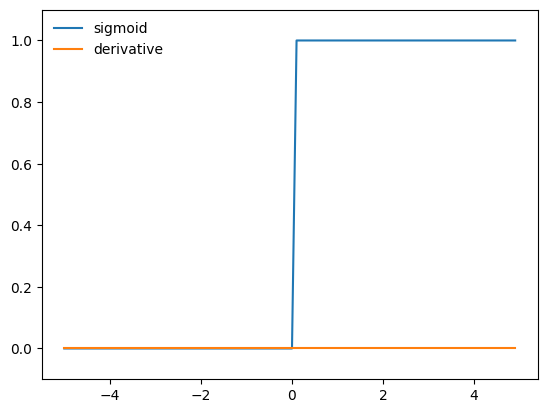

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# 定義 sign 函數（同時解決 np.int 被棄用的寫法問題）
def sign(x):
    # 判斷 x 是否大於 0，將結果 (True/False) 轉為整數 (1/0) 的 NumPy 陣列
    return np.array(x > 0, dtype=int)

# 定義 sign 函數的梯度（導數）
def grad_sign(x):
    # 回傳一個形狀跟 x 一樣，但數值全為 0 的陣列
    return np.zeros_like(x)

# 產生 x 軸資料點：範圍從 -5.0 到 5.0，步距 (間隔) 為 0.1
x = np.arange(-5.0, 5.0, 0.1)

plt.ylim(-0.1, 1.1) # 設定 y 軸的顯示範圍
plt.plot(x, sign(x), label="sigmoid") # 繪製 sign 函數圖形 (注意：程式碼中標籤命名為 sigmoid)
plt.plot(x, grad_sign(x), label="derivative") # 繪製導數圖形
plt.legend(loc="upper left", frameon=False) # 顯示圖例：位置在右上角，去除圖例邊框
plt.show() # 顯示圖表

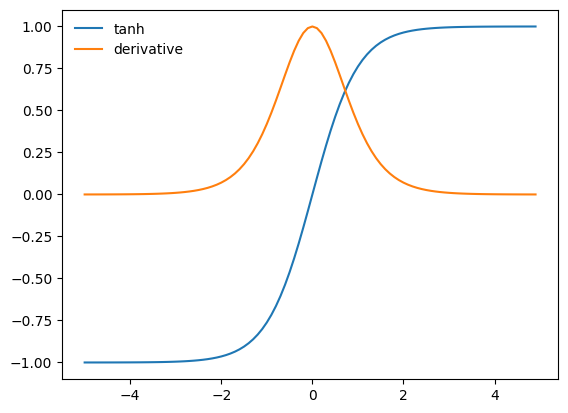

In [ ]:
# 定義 tanh 函數的梯度（導數）
def grad_tanh(x):
    # 先計算 tanh(x) 的值，其數學公式通常記為 a
    a = np.tanh(x)
    # 回傳 tanh 的導數公式：1 - tanh(x)^2
    return 1 - a**2

# 產生 x 軸的資料點：從 -5.0 到 5.0，間隔為 0.1
x = np.arange(-5.0, 5.0, 0.1)

# 繪製 tanh 函數圖形
plt.plot(x, np.tanh(x), label="tanh")
# 繪製 tanh 導數的圖形
plt.plot(x, grad_tanh(x), label="derivative")

# 設定圖例位置在右上角，並關閉圖例的外框
plt.legend(loc="upper left", frameon=False)

# 將圖表渲染出來
plt.show()

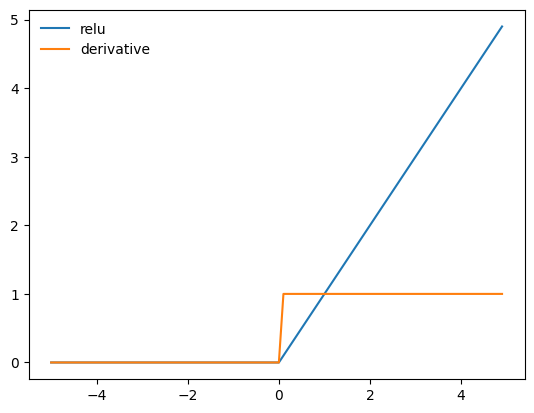

In [ ]:
# 定義 ReLU 啟動函數
def relu(x):
    # 使用 np.maximum 比較 0 與 x，取較大值（即負數歸零，正數保留原值）
    return np.maximum(0, x)

# 定義 ReLU 的梯度（導數）
def grad_relu(x):
    # 當 x > 0 時，導數為 1；當 x <= 0 時，導數為 0
    # 乘上 1. 是為了將布林值 (True/False) 轉換為浮點數 (1.0/0.0)
    return 1. * (x > 0)

# 產生 x 軸資料：從 -5.0 到 5.0，間隔為 0.1 的 NumPy 陣列
x = np.arange(-5.0, 5.0, 0.1)

# 繪製 ReLU 函數圖形
plt.plot(x, relu(x), label="relu")

# 繪製 ReLU 導數的圖形（呈現階梯狀）
plt.plot(x, grad_relu(x), label="derivative")

# 設定圖例顯示在右上角，且不顯示圖例框線
plt.legend(loc="upper left", frameon=False)

# 顯示最終繪圖結果
plt.show()

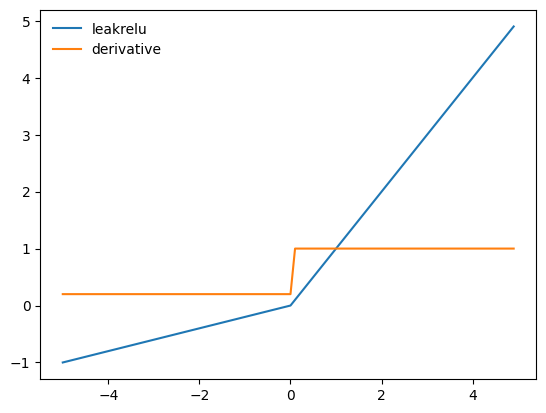

In [ ]:
import numpy as np

# 定義 Leaky ReLU 函數，k 為負數區域的斜率（預設為 0.2）
def leakRelu(x, k=0.2):
    # 先複製一份 x 陣列，避免直接修改到原始資料（Pass by reference 問題）
    y = np.copy(x)
    # 將所有小於 0 的元素乘以 k
    y[y < 0] *= k
    return y

# 定義 Leaky ReLU 的梯度（導數）
def grad_leakRelu(x, k=0.2):
    # 方法一：利用 np.clip 將布林值轉為 k (False) 或 1.0 (True)
    return np.clip(x > 0, k, 1.0)

    # 以下為被 unreachable 的程式碼（因為上面已經 return 了）
    # 建立一個與 x 形狀相同且數值全為 1 的陣列
    grad = np.ones_like(x)
    # 將 x 小於 0 的對應位置設為 alpha（注意：這裡 alpha 應為 k 才有定義）
    grad[x < 0] = alpha
    return grad

# 產生 x 軸資料點：從 -5.0 到 5.0，間隔 0.1
x = np.arange(-5.0, 5.0, 0.1)

# 繪製 Leaky ReLU 函數圖形
plt.plot(x, leakRelu(x), label="leakrelu")

# 繪製 Leaky ReLU 導數圖形（在 y 軸 0.2 與 1.0 之間跳變）
plt.plot(x, grad_leakRelu(x), label="derivative")

# 設定圖例顯示在右上角，並隱藏邊框
plt.legend(loc="upper left", frameon=False)

# 渲染圖表
plt.show()

## 神經網路向前傳播

1. 啟動函數 (Activation Function)程式碼中使用的 g1 與 g2 均為 Sigmoid 函數：

$$g(z) = \sigma(z) = \frac{1}{1 + e^{-z}}$$

2. 第一層運算 (Layer 1)從輸入層 $x$ 到第一個隱藏層的計算。

* 加權總和 (Weighted Sum)：$$z_1 = x \cdot W_1 + b_1$$維度：$(1 \times 2) \cdot (2 \times 4) + (1 \times 4) \rightarrow (1 \times 4)$

* 啟動值 (Activation)：$$a_1 = g_1(z_1)$$

3. 第二層運算 (Layer 2)從第一個隱藏層 $a_1$ 到輸出層的計算。

* 加權總和 (Weighted Sum)：$$z_2 = a_1 \cdot W_2 + b_2$$

* 維度：$(1 \times 4) \cdot (4 \times 3) + (1 \times 3) \rightarrow (1 \times 3)$

* 最終輸出 (Output)：$$a_2 = g_2(z_2)$$

In [ ]:
import numpy as np

# 定義 Sigmoid 啟動函數
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 將 g1, g2 指定為 sigmoid 函數（模擬不同層的啟動函數）
g1 = sigmoid
g2 = sigmoid

# 設定輸入向量 x 以及第一層的權重 W1、偏值 b1
x = np.array([1.0, 0.5])              # 輸入 x：維度為 (2,) 的一維陣列 (1x2 行向量)
W1 = np.array([[0.1, 0.3, 0.5, 0.2],
               [0.4, 0.6, 0.7, 0.1]])   # W1 權重矩陣：維度為 (2, 4)
b1 = np.array([0.1, 0.2, 0.3, 0.4])    # 偏值 (Bias) b1：維度為 (4,) 的行向量

print("x.shape", x.shape)              # 輸出 x 的形狀：(2,)
print("W1.shape", W1.shape)            # 輸出 W1 的形狀：(2, 4)
print("b1.shape", b1.shape)            # 輸出 b1 的形狀：(4,)

# 第一層運算：計算輸入 x 與權重 W1 的加權總和 (z1) 及其啟動值 (a1)
z1 = np.dot(x, W1) + b1                # 矩陣內積運算，結果維度為 (4,)
a1 = g1(z1)                            # 通過啟動函數，結果維度為 (4,)
print("z1", z1)
print("a1", a1)

# 設定第一層輸出 a1 與第二層權重 W2、偏值 b2 的關係
W2 = np.array([[0.1, 1.4, 0.2], [2.5, 0.6, 0.3], [1.1, 0.7, 0.8], [0.3, 1.5, 2.1]])
b2 = np.array([0.1, 2, 0.3])
print("a1.shape", a1.shape)            # 修正原註解錯誤：應為 a1 的形狀 (4,)
print("W2.shape", W2.shape)            # W2 形狀為 (4, 3)
print("b2.shape", b2.shape)            # b2 形狀為 (3,)

# 第二層運算：從 a1 計算出第二層的 z2 與 a2 值
z2 = np.dot(a1, W2) + b2               # 計算第二層的線性組合
a2 = g2(z2)                            # 通過啟動函數得到最終輸出
print("z2", z2)
print("a2", a2)

x.shape (2,)
W1.shape (2, 4)
b1.shape (4,)
z1 [0.4  0.8  1.15 0.65]
a1 [0.59868766 0.68997448 0.75951092 0.65701046]
a1.shape (4,)
W2.shape (4, 3)
b2.shape (3,)
z2 [2.91737012 4.76932075 2.61406058]
a2 [0.94869845 0.99158527 0.93176103]


### 多樣本的向前傳播

In [ ]:
# 定義輸入矩陣 X，這裡包含了 2 筆樣本 (Batch Size = 2)，每筆樣本有 2 個特徵
X = np.array([[1.0, 2.0], [3.0, 4.0]])
W1 = np.array([[0.1, 0.3, 0.5, 0.2],
               [0.4, 0.6, 0.7, 0.1]])   # 第一層權重矩陣 W1：2x4 矩陣
b1 = np.array([0.1, 0.2, 0.3, 0.4])    # 第一層偏值 b1：1x4 行向量

print("X.shape", X.shape)   # (2, 2)
print("W1.shape", W1.shape) # (2, 4)
print("b1.shape", b1.shape) # (4,)

# 計算第一層的線性組合 Z1 與啟動值 A1
# 這裡利用了 NumPy 的廣播機制 (Broadcasting)，b1 會自動加到每一列
Z1 = np.dot(X, W1) + b1
A1 = sigmoid(Z1)
print("Z1:", Z1)
print("A1:", A1)

# 設定第二層權重 W2 與偏值 b2
W2 = np.array([[0.1, 1.4, 0.2], [2.5, 0.6, 0.3], [1.1, 0.7, 0.8], [0.3, 1.5, 2.1]])
b2 = np.array([0.1, 2, 0.3])

# 這裡的註解保留原樣（注意：原註解中的 shape 描述與實際程式運作結果可能不同）
print("A1.shape", A1.shape) # 實際上為 (2, 4)
print("W2.shape", W2.shape) # 實際上為 (4, 3)
print("b2.shape", b2.shape) # 實際上為 (3,)

# 計算第二層的 Z2 與 A2
Z2 = np.dot(A1, W2) + b2
A2 = sigmoid(Z2)
print("Z2:", Z2)
print("A2:", A2)

X.shape (2, 2)
W1.shape (2, 4)
b1.shape (4,)
Z1: [[1.  1.7 2.2 0.8]
 [2.  3.5 4.6 1.4]]
A1: [[0.73105858 0.84553473 0.90024951 0.68997448]
 [0.88079708 0.97068777 0.9900482  0.80218389]]
A1.shape (2, 4)
W2.shape (4, 3)
b2.shape (3,)
Z2: [[3.4842095  5.19593923 2.86901816]
 [3.94450732 5.71183814 3.24399047]]
A2: [[0.97023513 0.9944915  0.94629347]
 [0.98100697 0.99670431 0.96245657]]


## 損失函數

這段程式碼所計算的是 均方誤差 (MSE) 的變體，在數學上通常定義為 代價函數 (Cost Function) $J$：$$J = \frac{1}{2m} \sum_{i=1}^{m} \sum_{j=1}^{n} (f_{ij} - y_{ij})^2$$

* $m$：代表樣本數量 (Batch Size)

* $n$：代表輸出特徵的數量

* $f_{ij}$：預測值矩陣 $F$ 中的第 $i$ 列第 $j$ 行元素

* $y_{ij}$：真實值矩陣 $Y$ 中的第 $i$ 列第 $j$ 行元素

* $1/2$：在分母加上 $2$ 是為了在進行反向傳播 (Backpropagation) 求導時，能與平方項產生的 $2$ 抵消，簡化計算結果。

In [ ]:
# F 代表 Model 的預測值 (Forecast/Forward)，這裡是一個 2x3 的矩陣
F = np.array([[0.1, 0.2, 0.5], [0.1, 0.2, 0.5]])
# Y 代表真實標籤 (Ground Truth/Labels)
Y = np.array([[0.3, 0.4, 0.2], [0.3, 0.4, 0.2]])

# 取得樣本數 (Batch Size)，這裡 m = 2
m = F.shape[0]

# 計算損失值 (Loss)：
# 1. (F - Y) ** 2：計算預測值與真實值的誤差平方
# 2. np.sum(...)：將矩陣內所有元素的誤差平方加總
# 3. /(2*m)：除以兩倍的樣本數 (這是線性迴歸常用的代價函數寫法)
loss = np.sum((F - Y) ** 2) / (2 * m)

# 註解掉的另一種寫法：使用 NumPy 的內建平均值函數，這會計算整體的 Mean Square
# loss = (np.square(H-Y)).mean()

print(loss)

0.08499999999999999


In [ ]:
# 定義 MSE 損失函數
# F: 預測值 (Forecast), Y: 真實標籤 (Labels)
# divid_2: 布林值，決定是否要除以 2 (常用於簡化梯度運算)
def mse_loss(F, Y, divid_2=False):
    # 取得樣本數 (Batch Size)
    m = F.shape[0]

    # 計算平方誤差並取平均 (Sum of Squares / m)
    loss = np.sum((F - Y) ** 2) / m

    # 如果 divid_2 為 True，則將結果再除以 2
    if divid_2:
        loss /= 2

    return loss

# 呼叫函式計算損失值，並開啟「除以 2」的選項
mse_loss(F, Y, True)

np.float64(0.08499999999999999)

## 二元交叉熵損失函數

In [ ]:
import numpy as np

# 模型預測每個樣本屬於「正類（1）」的機率
f = np.array([0.1, 0.2, 0.5])

# 實際標籤（0 或 1），共三筆資料
y = np.array([0, 1, 0])

def binary_cross_entropy(f, y, epsilon=1e-8):
    # 取得樣本數量
    m = len(y)

    # 計算 binary cross entropy loss 的平均值
    # epsilon 用來避免 log(0) 的情況
    return - (1. / m) * np.sum(
        np.multiply(y, np.log(f + epsilon)) +
        np.multiply((1 - y), np.log(1 - f + epsilon))
    )

# 呼叫函式計算 loss
binary_cross_entropy(f, y)

np.float64(0.8026485091802541)

In [ ]:
def cross_entropy_loss_onehot(F, Y):
    m = len(F)  # 取得樣本數（有幾筆資料）
    # 計算 one-hot 標籤下的 cross entropy loss
    # Y 是正確答案（one-hot），F 是模型預測的機率
    return -(1. / m) * np.sum(np.multiply(Y, np.log(F)))

# 模型輸出的機率，每一列代表一筆資料、每一欄代表一個類別
F = np.array([[0.2, 0.5, 0.3],
              [0.4, 0.3, 0.3]])

# 對應的正確答案（one-hot 編碼）
Y = np.array([[0, 0, 1],
              [1, 0, 0]])

# 計算 cross entropy loss
cross_entropy_loss_onehot(F, Y)

np.float64(1.0601317681000455)

## 以數值梯度為基礎的神經網路訓練

> 請注意：這裡是全新的測試資料集了。

```
X = np.array([[1., 2.], [3., 4.], [5., 6.]])
y = np.array([2, 0, 1])
```

### 參數的初始化

In [ ]:
import numpy as np  # 匯入 numpy 套件，常用來做矩陣與數值運算

def initialize_parameters(n_x, n_h, n_o):
    np.random.seed(2)  # 固定隨機種子，確保每次執行產生的隨機值都一樣，方便除錯與重現結果

    W1 = np.random.randn(n_x, n_h) * 0.01  # 第一層權重矩陣，使用小的隨機值初始化
    b1 = np.zeros((1, n_h))                # 第一層偏置，初始化為 0
    W2 = np.random.randn(n_h, n_o) * 0.01  # 第二層權重矩陣，使用小的隨機值初始化
    b2 = np.zeros((1, n_o))                # 第二層偏置，初始化為 0

    assert (W1.shape == (n_x, n_h))  # 確認 W1 的維度是否正確
    assert (b1.shape == (1, n_h))    # 確認 b1 的維度是否正確
    assert (W2.shape == (n_h, n_o))  # 確認 W2 的維度是否正確
    assert (b2.shape == (1, n_o))    # 確認 b2 的維度是否正確

    parameters = [W1, b1, W2, b2]  # 將所有參數包成一個 list 方便後續使用
    return parameters              # 回傳初始化好的參數

# 測試這個函式
n_x, n_h, n_o = 2, 4, 3
parameters = initialize_parameters(n_x, n_h, n_o)
print("W1 = " + str(parameters[0]))
print("b1 = " + str(parameters[1]))
print("W2 = " + str(parameters[2]))
print("b2 = " + str(parameters[3]))

W1 = [[-0.00416758 -0.00056267 -0.02136196  0.01640271]
 [-0.01793436 -0.00841747  0.00502881 -0.01245288]]
b1 = [[0. 0. 0. 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454]
 [ 0.02292208  0.00041539 -0.01117925]
 [ 0.00539058 -0.0059616  -0.0001913 ]
 [ 0.01175001 -0.00747871  0.00009025]]
b2 = [[0. 0. 0.]]


### 設定啟動函數

In [ ]:
def sigmoid(x):
    # Sigmoid 啟用函數，常用在二元分類
    # 會把輸入值壓縮到 0～1 之間
    return 1 / (1 + np.exp(-x))

def softmax(Z):
    # Softmax 函數，常用在多分類的輸出層
    # 先減掉每一列的最大值，避免 exp 爆掉（數值穩定）
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))

    # 每一列做正規化，讓機率總和等於 1
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

### 向前傳播的計算

In [ ]:
def forward_propagation(X, parameters):
    # 從 parameters 裡面把權重跟偏差拆出來
    W1, b1, W2, b2 = parameters

    # 第一層線性運算
    # X 乘上 W1 再加上 b1
    # Z1 形狀：(3,2)(2,4)+(1,4) => (3,4)
    Z1 = np.dot(X, W1) + b1

    # 第一層的啟用函數，使用 tanh
    A1 = np.tanh(Z1)

    # 第二層線性運算
    # A1 乘上 W2 再加上 b2
    # Z2 形狀：(3,4)(4,3)+(1,3) => (3,3)
    Z2 = np.dot(A1, W2) + b2

    # 原本可能要接 sigmoid，但目前被註解掉
    # A2 = sigmoid(Z2)

    # 確認輸出的 shape 是否符合預期
    assert(Z2.shape == (X.shape[0], 3))

    # 回傳最後一層的線性輸出（尚未過 softmax）
    return Z2


# 範例輸入資料，每一列是一筆樣本
X = np.array([[1., 2.], [3., 4.], [5., 6.]])

# 做一次 forward propagation
Z2 = forward_propagation(X, parameters)

# 印出結果
print(Z2)

[[-0.00013625  0.00048749 -0.0000248 ]
 [-0.00016499  0.00101574 -0.00005999]
 [-0.00019614  0.00154048 -0.00009366]]


### 計算損失函數（多分類交叉熵）

In [ ]:
def softmax_cross_entropy(Z, y, onehot=False):
    # 樣本的總數（有幾筆資料）
    m = len(Z)

    # 先把模型輸出 Z 丟進 softmax，算出每一類的機率
    F = softmax(Z)

    if onehot:
        # 如果 y 是 one-hot 編碼
        # 直接用 cross entropy 的公式算 loss
        loss = -np.sum(y * np.log(F)) / m
    else:
        # 如果 y 是類別的 index（例如 0、1、2）
        # 把 y 攤平成一維（但這行實際上不會影響後面）
        y.flatten()

        # 取出每筆資料「正確類別」對應的機率，再取 log
        log_Fy = -np.log(F[range(m), y])

        # 把所有樣本的 loss 加起來，再取平均
        loss = np.sum(log_Fy) / m

    return loss

# 與前一個差別在於有設定正則化（reg=1e-3）
def softmax_cross_entropy_reg(Z, Y, parameters, onehot=False, reg=1e-3):
    # 從 parameters 裡面取出第一層的權重
    W1 = parameters[0]

    # 從 parameters 裡面取出第二層的權重
    W2 = parameters[2]

    # 原本的 softmax cross entropy loss
    # 再加上 L2 regularization（權重平方後相加）
    L = softmax_cross_entropy(Z, y, onehot) + reg * (np.sum(W1**2) + np.sum(W2**2))

    # 確認算出來的 L 是 float 型態
    assert(isinstance(L, float))

    return L


# 範例輸入資料
# 每一個數字代表該筆資料的正確類別
y = np.array([2, 0, 1])

# 呼叫含正則化（regularization）的損失函數
loss_results = softmax_cross_entropy_reg(Z2, y, parameters)
print(loss_results)
# softmax_cross_entropy(Z2, y) # 參考：不含正規化的損失函數

# 直接整合「向前傳播函式」與「損失函數」的函式
def compute_loss_reg(f, loss, X, Y, parameters, onehot = False, reg = 1e-3):
    Z2 = f(X, parameters)
    return loss(Z2, y, parameters, onehot, reg)

# 測試看看，應該會跟之前的損失函數一樣的結果
loss_results = compute_loss_reg(forward_propagation, softmax_cross_entropy_reg, X, y, parameters)
print(loss_results)

1.098427770814438
1.098427770814438


In [ ]:
# 通用數值梯度函式
def numerical_gradient(f, params, eps=1e-6):
    numerical_grads = []  # 用來存每一個參數對應的梯度

    for x in params:
        # x 可能是多維陣列，這裡會針對 x 裡面的每一個元素計算數值梯度
        grad = np.zeros(x.shape)  # 建立一個跟 x 形狀一樣的陣列來存梯度

        # 使用 nditer 逐一走訪 x 裡面的每個元素
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

        while not it.finished:
            idx = it.multi_index   # 目前元素的索引位置

            old_value = x[idx]     # 先把原本的值存起來

            x[idx] = old_value + eps  # 對目前的值加上一個很小的 eps
            fx = f()                  # 計算 f(x + eps) 的結果

            x[idx] = old_value - eps  # 對目前的值減去一個很小的 eps
            fx_ = f()                 # 計算 f(x - eps) 的結果

            # 使用中央差分法計算數值梯度
            grad[idx] = (fx - fx_) / (2 * eps)

            x[idx] = old_value        # 記得把參數值還原，避免影響後續計算
            it.iternext()             # 移動到下一個元素

        numerical_grads.append(grad)  # 將目前參數的梯度存起來

    return numerical_grads            # 回傳所有參數的梯度

def f():
    return compute_loss_reg(forward_propagation, softmax_cross_entropy_reg, X, y, parameters)


In [ ]:
print(X.shape)
print(y.shape)

parameters = initialize_parameters(n_x, n_h, n_o)

print("W1 " + str(parameters[0]))

num_grads = numerical_gradient(f, parameters)

print("W1 " + str(parameters[0].shape))
print("b1 " + str(parameters[1].shape))
print("W2 " + str(parameters[2].shape))
print("b2 " + str(parameters[3].shape))



for i in num_grads:
    print(i)



(3, 2)
(3,)
W1 [[-0.00416758 -0.00056267 -0.02136196  0.01640271]
 [-0.01793436 -0.00841747  0.00502881 -0.01245288]]
W1 (2, 4)
b1 (1, 4)
W2 (4, 3)
b2 (1, 3)
[[ 0.00956814 -0.00773283  0.00375128  0.00506506]
 [ 0.00950714 -0.00774762  0.00379433  0.0050036 ]]
[[-0.00003346  0.00000091 -0.00000973 -0.00000375]]
[[ 0.00002882  0.0145603  -0.01461743]
 [ 0.00005416  0.00596787 -0.00599771]
 [ 0.00002879  0.01083308 -0.01086339]
 [ 0.00002327 -0.00264762  0.00263307]]
[[-0.00014298  0.00025054 -0.00010756]]


In [ ]:
def max_abs(grads):
    # 計算所有梯度中，取「絕對值後的最大值」
    # 常用來判斷梯度是不是已經小到可以停止訓練
    return max([np.max(np.abs(grad)) for grad in grads])

def gradient_descent_ANN(f, X, y, parameters, reg=0., alpha=0.01,
                         iterations=100, gamma=0.8, epsilon=1e-8):
    losses = []  # 用來記錄每一次迭代的 loss 值

    # 進行多次迭代來更新參數
    for i in range(0, iterations):
        loss = f()  # 計算目前參數下的 loss
        grads = numerical_gradient(f, parameters)  # 用數值法計算每個參數的梯度

        # 如果所有梯度的最大值小於 epsilon，代表變化已經很小
        if max_abs(grads) < epsilon:
            print("gradient is small enough!")
            print("iterated num is :", i)
            break

        # 依序更新每個參數（梯度下降）
        for param, grad in zip(parameters, grads):
            param -= alpha * grad  # 依照學習率調整參數

        losses.append(loss)  # 將本次的 loss 存起來

    # 回傳最後的參數與所有迭代過程中的 loss
    return parameters, losses

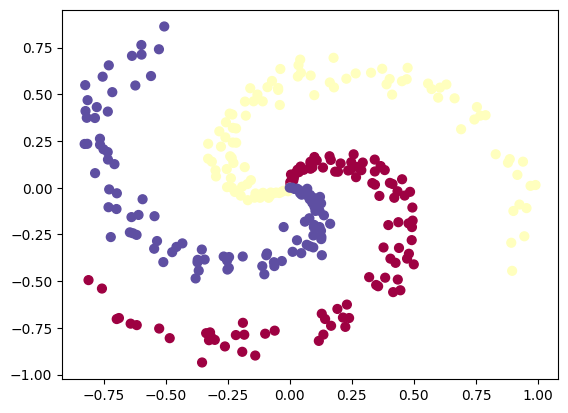

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)  # 固定隨機種子，讓每次產生的亂數結果都一樣，方便重現結果

def gen_spiral_dataset(N=100, D=2, K=3):
    X = np.zeros((N*K, D))  # 建立資料矩陣，每一列代表一筆資料
    y = np.zeros(N*K, dtype='uint8')  # 建立標籤陣列，用來存每筆資料的類別

    for j in range(K):  # 依序產生每一個類別的資料
        ix = range(N*j, N*(j+1))  # 計算目前類別在資料中的索引範圍
        r = np.linspace(0.0, 1, N)  # 半徑，從中心往外均勻增加
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # 角度，加上一點雜訊讓資料比較分散
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]  # 轉成平面座標，形成螺旋狀
        y[ix] = j  # 設定對應的類別標籤

    return X, y  # 回傳資料與標籤

N, D, K = 100, 2, 3  # 設定每個類別的資料數量、維度、類別數

X_spiral, y_spiral = gen_spiral_dataset()  # 產生螺旋狀資料集

plt.scatter(
    X_spiral[:, 0],
    X_spiral[:, 1],
    c=y_spiral,        # 依照類別上色
    s=40,              # 點的大小
    cmap=plt.cm.Spectral  # 使用光譜色盤
)
plt.show()  # 顯示圖表


[[ 3.38194147  0.61400814 -4.03170551  4.58489696 -3.51531033]
 [ 1.71824704  4.22027989 -0.02442567 -2.94546311 -1.70145361]]
[[-0.22723575  2.46226125 -1.60195931  0.13984354  1.93787105]]
[[ 3.02203956 -0.56366338 -2.4544793 ]
 [-3.6239618   1.24190103  2.38047373]
 [ 0.11243853 -2.84923368  2.73734621]
 [ 0.32998041 -3.41782306  3.08645755]
 [ 2.15442708 -3.60898609  1.45311243]]
[[ 2.05883955 -0.01895987 -2.03987967]]
[np.float64(1.0986563635370763), np.float64(0.7420794670405607), np.float64(0.6457726084004204), np.float64(0.49880286074711844), np.float64(0.46311932726687877), np.float64(0.42363075929080724), np.float64(0.3948402869938365), np.float64(0.38296313447623376), np.float64(0.3781912752955432), np.float64(0.3756863023861652)]


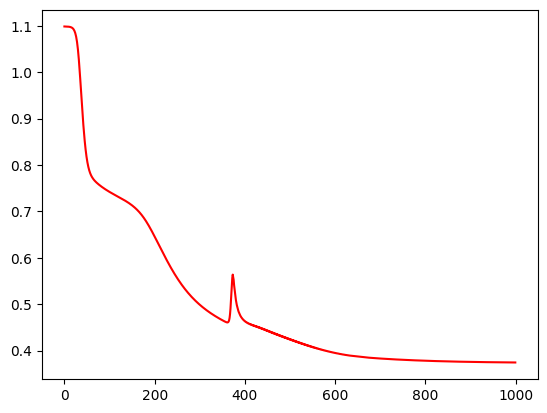

In [ ]:
# 指定訓練用的輸入資料（螺旋資料）
X = X_spiral
# 指定對應的標籤
y = y_spiral

# 設定輸入層、隱藏層、輸出層的神經元數量
n_x, n_h, n_o = 2, 5, 3

# 初始化模型參數（權重與偏差）
parameters = initialize_parameters(n_x, n_h, n_o)

# 學習率（learning rate）
alpha = 1e-0
# 梯度下降的迭代次數
iterations = 1000
# 正則化係數
lambda_ = 1e-3

# 重新定義 softmax cross entropy 搭配 L2 正則化的 loss function
# 這裡主要是包裝原本的 loss 計算方式
def corrected_softmax_cross_entropy_reg(Z, Y_param, parameters, onehot=False, reg=1e-3):
    # 第一層的權重
    W1 = parameters[0]
    # 第二層的權重
    W2 = parameters[2]

    # 計算 softmax cross entropy loss，加上 L2 正則化項
    L = softmax_cross_entropy(Z, Y_param, onehot=False) + reg * (np.sum(W1**2) + np.sum(W2**2))

    # 確認 loss 是 float 型態
    assert(isinstance(L, float))
    return L


# 重新定義計算 loss 的流程
# 負責先做 forward propagation，再算 loss
def corrected_compute_loss_reg(f_prop, loss_fn, X_data, Y_labels, parameters_list, reg_val=1e-3):
    # 前向傳播，取得模型輸出
    Z2 = f_prop(X_data, parameters_list)
    # 使用指定的 loss function 計算 loss
    return loss_fn(Z2, Y_labels, parameters_list, onehot=False, reg=reg_val)


# 定義一個不帶參數的函式，方便丟進梯度下降使用
def f():
    return corrected_compute_loss_reg(
        forward_propagation,
        corrected_softmax_cross_entropy_reg,
        X,
        y,
        parameters,
        lambda_
    )


# 執行類神經網路的梯度下降訓練
parameters, losses = gradient_descent_ANN(
    f, X, y, parameters, lambda_, alpha, iterations
)

# 印出每一組訓練後的參數
for param in parameters:
    print(param)

# 印出部分 loss 值，方便快速觀察趨勢
print(losses[:-1:len(losses)//10])

# 繪製 loss 隨訓練次數變化的圖
plt.plot(losses, color='r')


In [ ]:
def getAccuracy(X, y, parameters):
    # 透過 forward_propagation 做前向傳播，取得模型的預測結果
    predicts = forward_propagation(X, parameters)

    # 原本可能是要算 softmax 機率，這行目前被註解掉
    # probs = softmax(np.dot(X, w))

    # 對每一筆資料取機率最大的類別，當作最終預測結果
    predicts = np.argmax(predicts, axis=1)

    # 計算預測正確的比例，作為準確率（accuracy）
    accuracy = sum(predicts == y) / (float(len(y)))

    # 回傳準確率
    return accuracy

# 呼叫函式，計算目前模型在資料上的準確率
getAccuracy(X, y, parameters)

np.float64(0.9433333333333334)

(-1.9355521912329907, 1.8444478087670126)

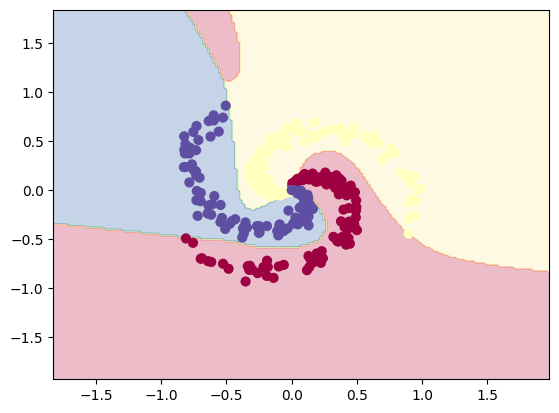

In [ ]:
# 繪製分類器的預測結果（決策邊界）
h = 0.02  # 網格的解析度，數值越小畫面越細緻，但計算會比較慢

# 設定 x、y 軸的範圍，並在原資料範圍外多留一點空間
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 建立整個平面上的座標網格
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# 將網格點整理成 (x, y) 的輸入格式
XX = np.c_[xx.ravel(), yy.ravel()]

# 將所有網格點丟進模型，取得預測結果
Z = forward_propagation(XX, parameters)

# 對每個點取預測機率最高的類別
Z = np.argmax(Z, axis=1)

# 把預測結果轉回跟網格一樣的形狀，方便畫圖
Z = Z.reshape(xx.shape)

# 建立圖表
fig = plt.figure()

# 繪製決策區域（不同顏色代表不同分類結果）
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)

# 繪製原始資料點，顏色代表實際類別
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

# 設定顯示範圍
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 將圖存成檔案（目前這行被註解掉）
# fig.savefig('spiral_linear.png')